In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import read_data as rd  # Importing the read_data.py module
import random
from scipy.signal import butter, filtfilt
from scipy.fft import fft

In [2]:
# Load data
dataset_dir = '/home/ecappiell/datasets/full'
data_arrays, labels, class_ids = rd.process_mafaulda_data(dataset_dir)

In [18]:
# Original sampling rate (in Hz)
original_sampling_rate = 50 * 10**3  # 50 kHz

# Target sampling rate (in Hz)
target_sampling_rate = 1 * 10**3  # 1 kHz

# Downsample the data
downsampled_data = rd.downsample_data(data_arrays, original_sampling_rate, target_sampling_rate)

In [19]:
# Function to apply a low-pass filter
def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y
# Function to compute the FFT and its magnitude
def compute_fft(data, fs):
    N = data.shape[0]
    T = 1.0 / fs
    yf = fft(data)
    xf = np.fft.fftfreq(N, T)[:N//2]
    return xf, 2.0/N * np.abs(yf[:N//2])
# Function to normalize the data using min-max scaling
def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    normalized = (data - min_val) / (max_val - min_val)
    return normalized

In [20]:
# Normalize the downsampled data
normalized_data = np.array([normalize_data(signal) for signal in downsampled_data])

In [21]:
# Define the cutoff frequency for the low-pass filter
cutoff_frequency = 10  # in Hz

# Apply the low-pass filter to the downsampled data
filtered_data = np.array([low_pass_filter(signal, cutoff_frequency, target_sampling_rate) for signal in normalized_data])

In [22]:
# Labels for each feature
feature_labels = [
    'Tachometer',
    'Underhang Bearing Accelerometer (Axial)',
    'Underhang Bearing Accelerometer (Radial)',
    'Underhang Bearing Accelerometer (Tangential)',
    'Overhang Bearing Accelerometer (Axial)',
    'Overhang Bearing Accelerometer (Radial)',
    'Overhang Bearing Accelerometer (Tangential)',
    'Microphone'
]

In [23]:
# Get the unique classes
unique_classes = np.unique(class_ids)
unique_labels = np.unique(labels)

In [24]:
# Create a mapping from class IDs to class labels
class_names = {cls: label for cls, label in zip(unique_classes, unique_labels)}

In [25]:
# Randomly select one example from each class
random_examples = []
for cls in unique_classes:
    indices = np.where(class_ids == cls)[0]
    random_example_index = random.choice(indices)
    random_examples.append((random_example_index, cls))

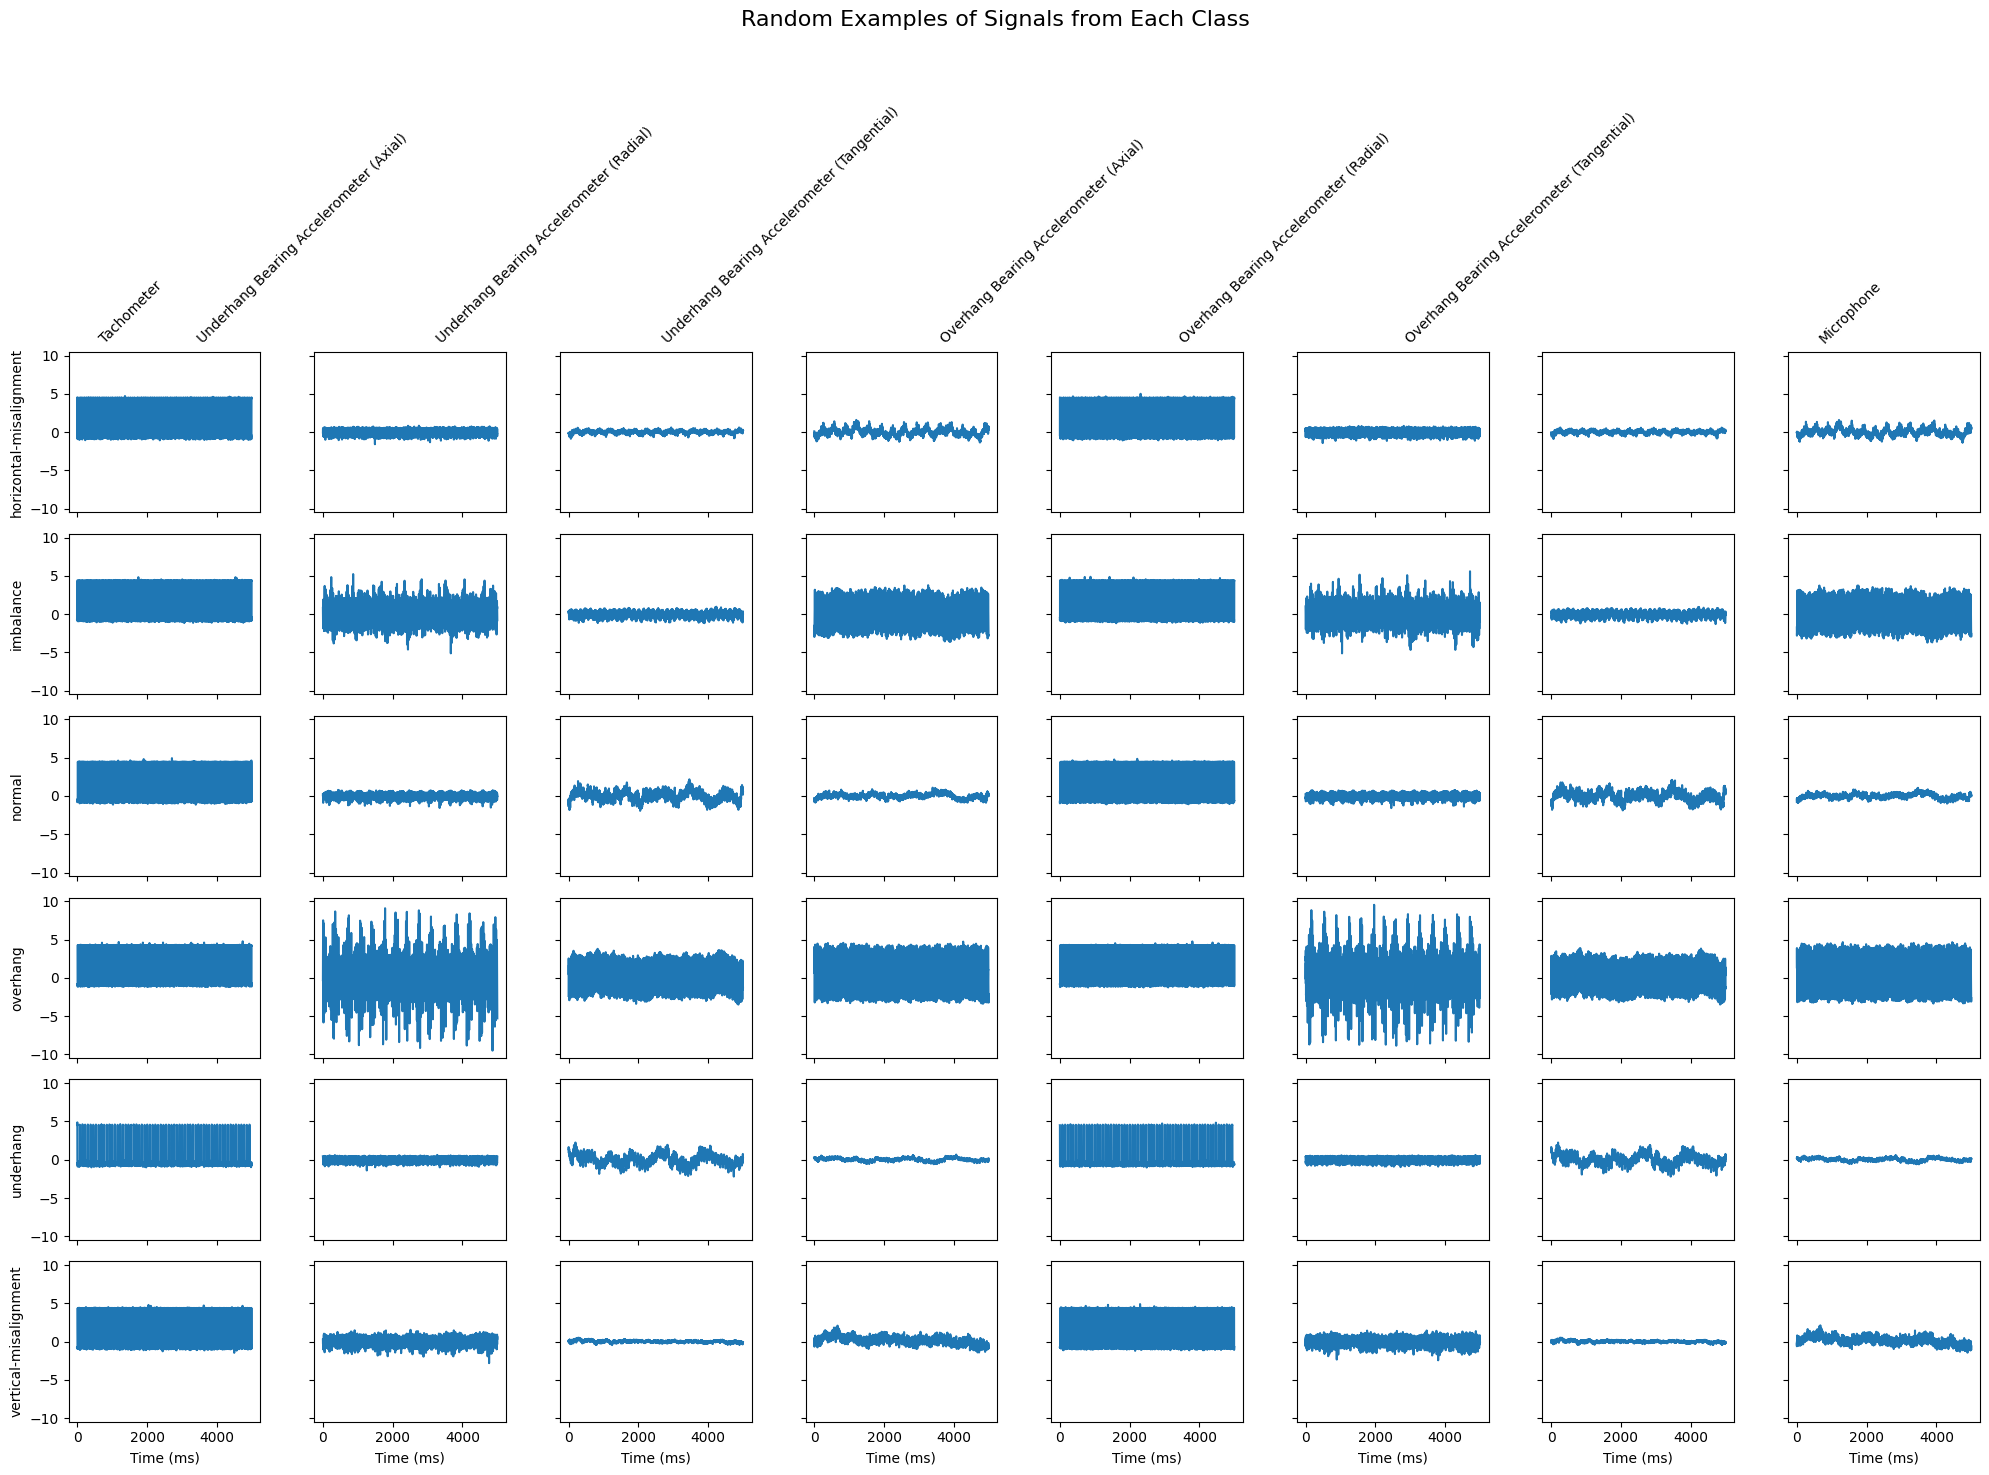

In [48]:
# Plot the signals for all classes and features
fig, axes = plt.subplots(len(unique_classes), 8, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Random Examples of Signals from Each Class', fontsize=16)

for i, (example_idx, cls) in enumerate(random_examples):
    signals = downsampled_data[example_idx]
    for j in range(8):
        ax = axes[i, j]
        ax.plot(signals[:, j])
        if i == 0:
            ax.set_title(feature_labels[j], fontsize=10, rotation=45, ha='right')
        if j == 0:
            ax.set_ylabel(class_names.get(cls, f'Class {cls}'), fontsize=10)
        if i == len(unique_classes) - 1:
            ax.set_xlabel('Time (ms)', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

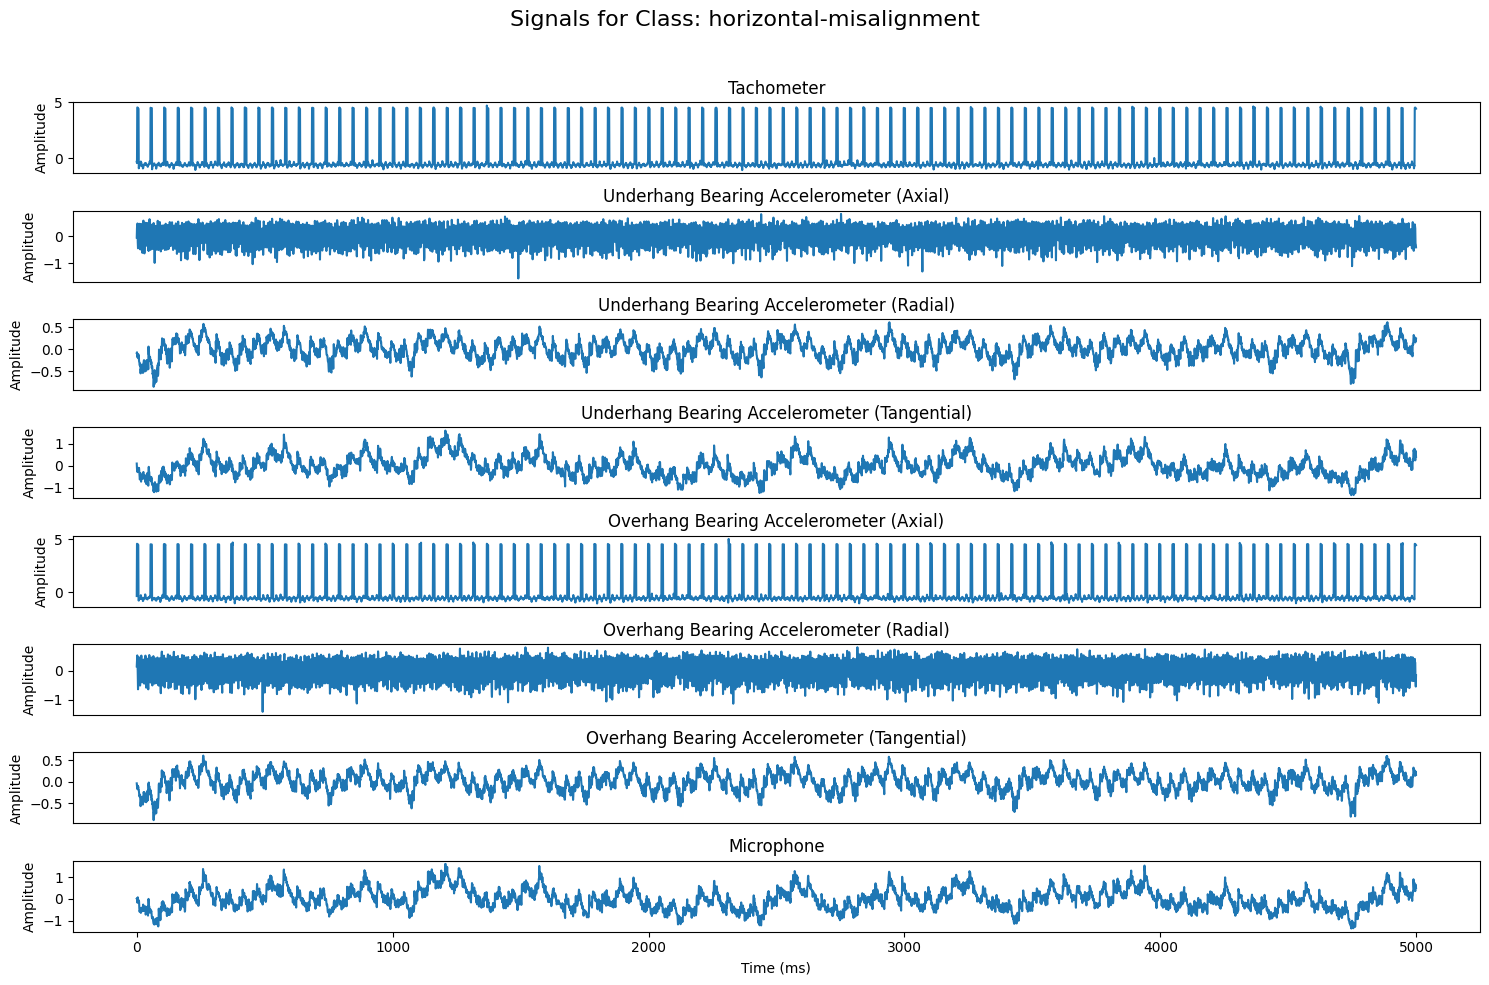

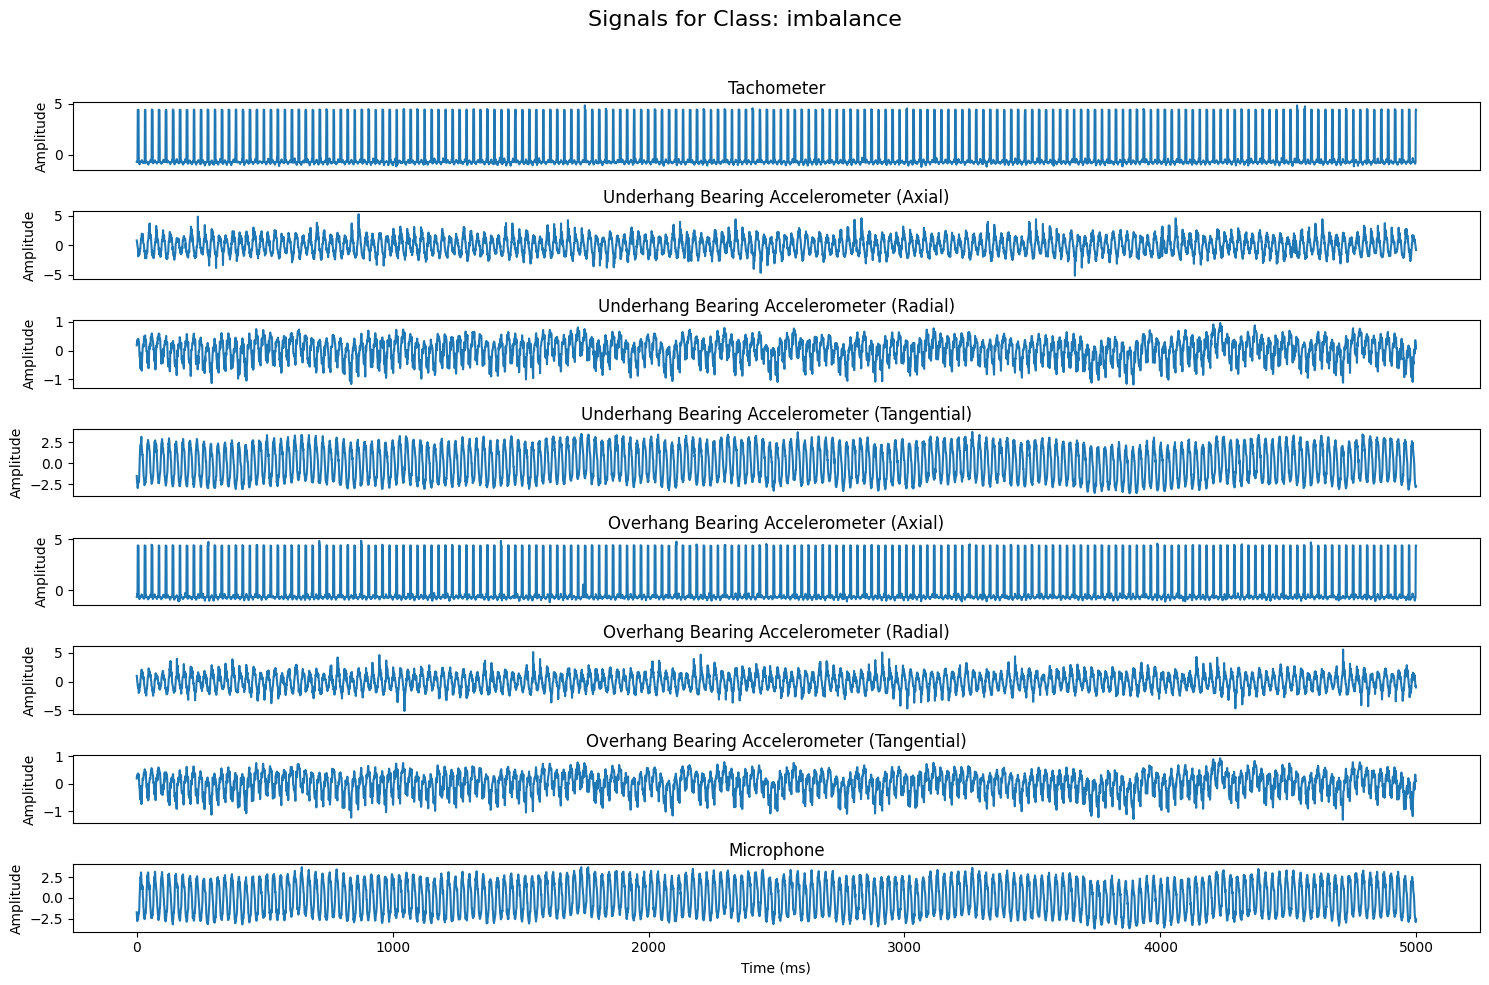

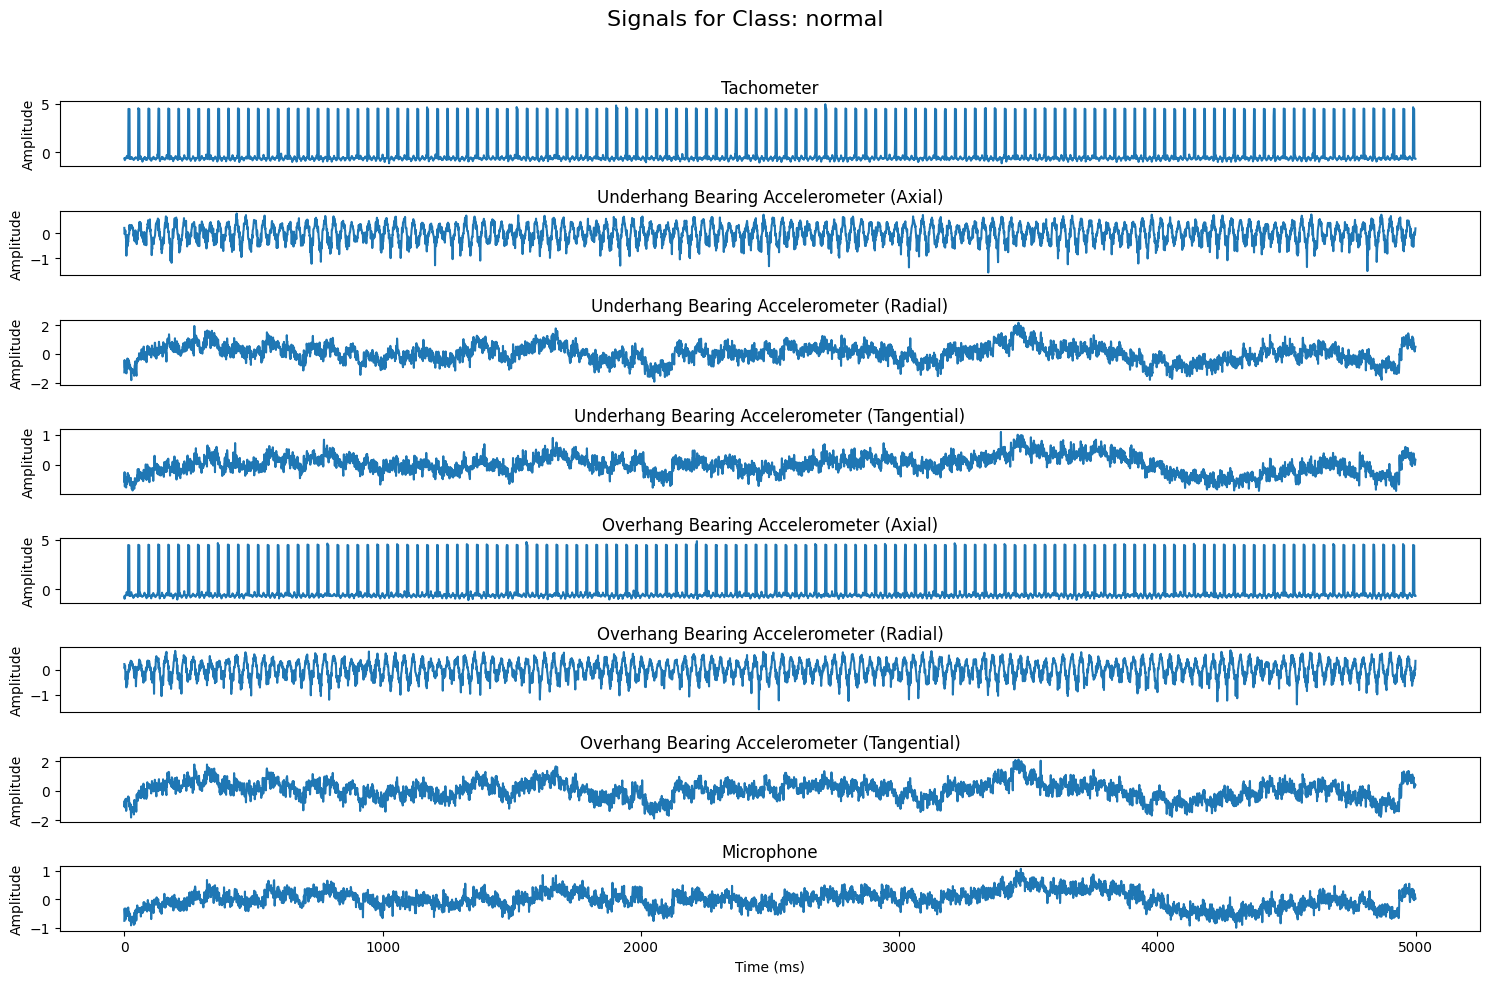

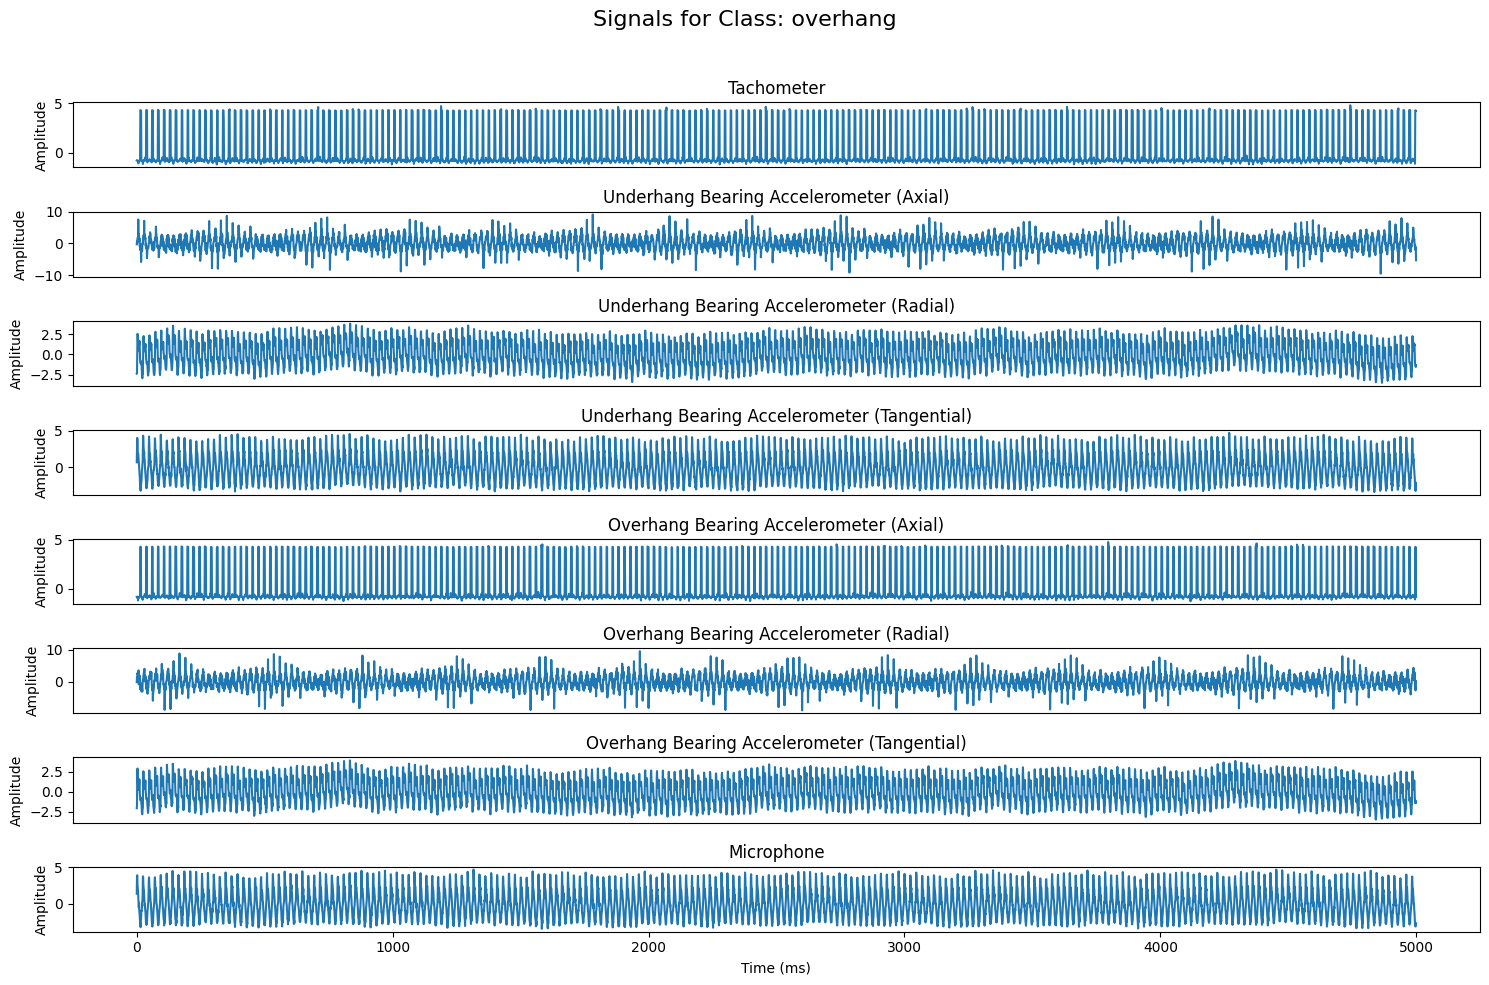

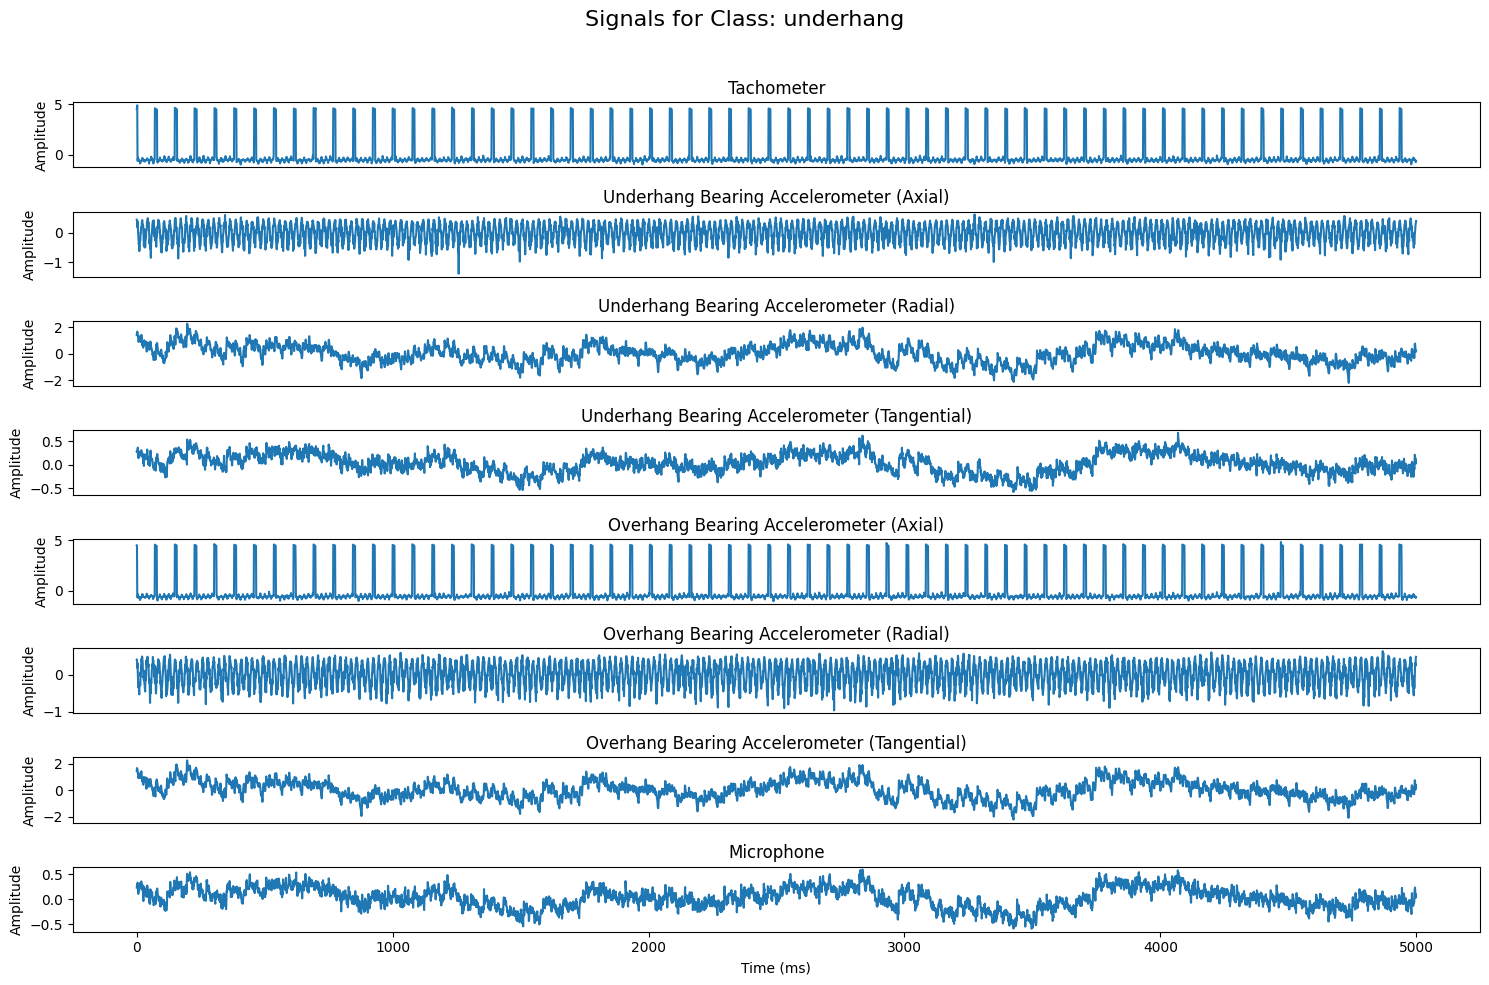

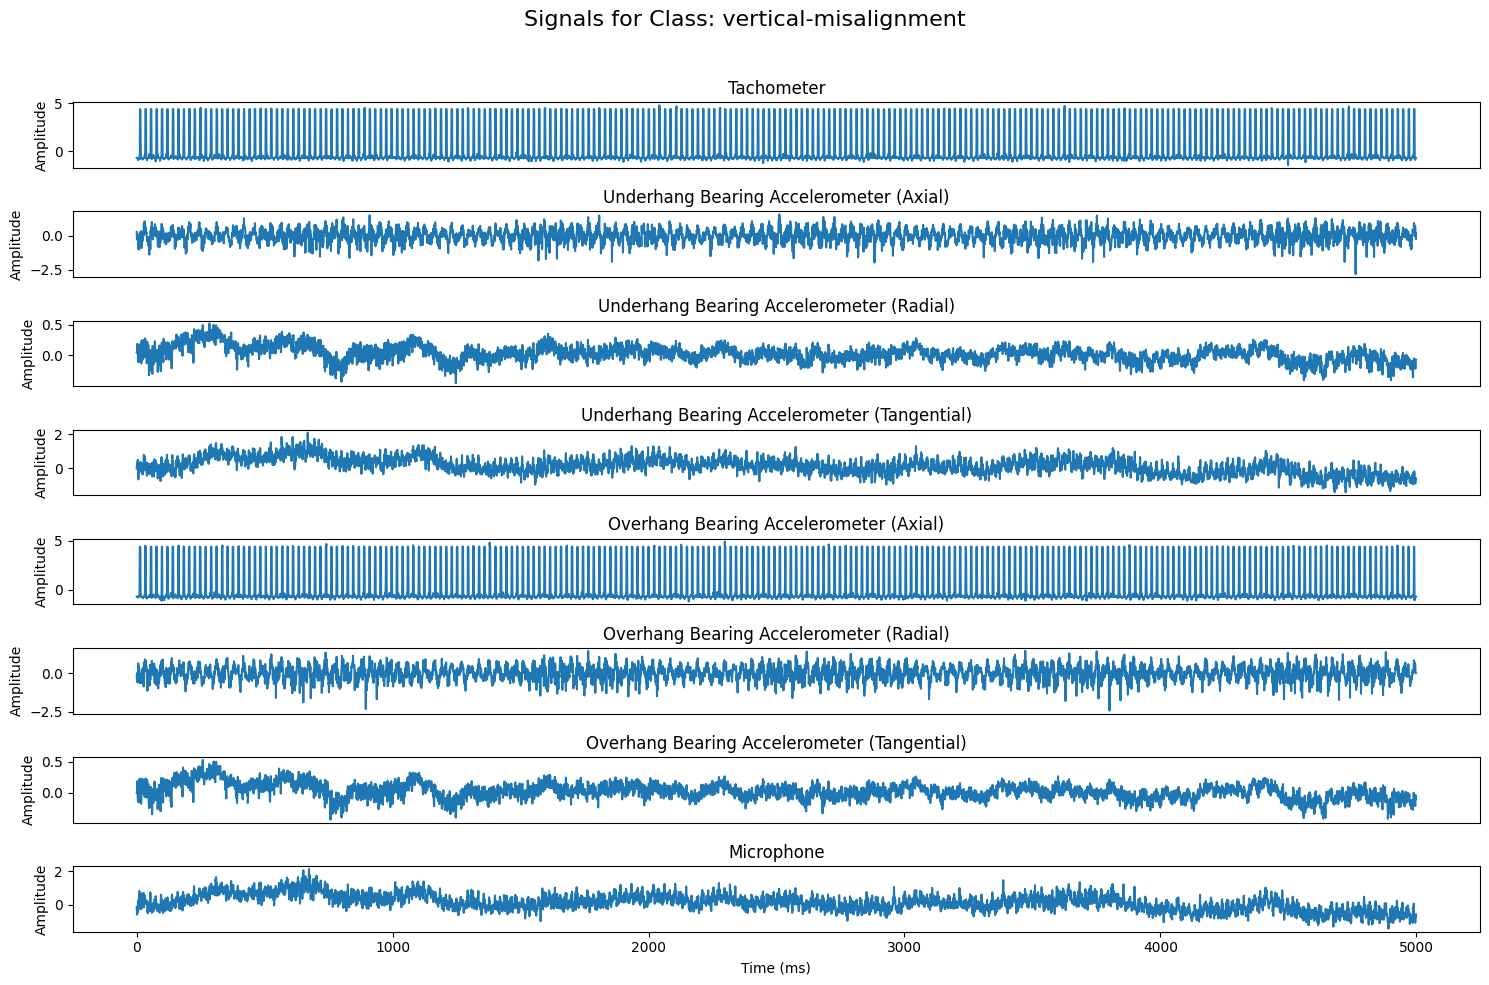

In [27]:
# Plot the signals for each class
for example_idx, cls in random_examples:
    signals = downsampled_data[example_idx]
    label = labels[example_idx]
    
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Signals for Class: {label}', fontsize=16)
    
    for i in range(8):
        plt.subplot(8, 1, i+1)
        plt.plot(signals[:, i])
        plt.title(feature_labels[i])
        if i < 7:
            plt.xticks([])
        if i == 7:
            plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

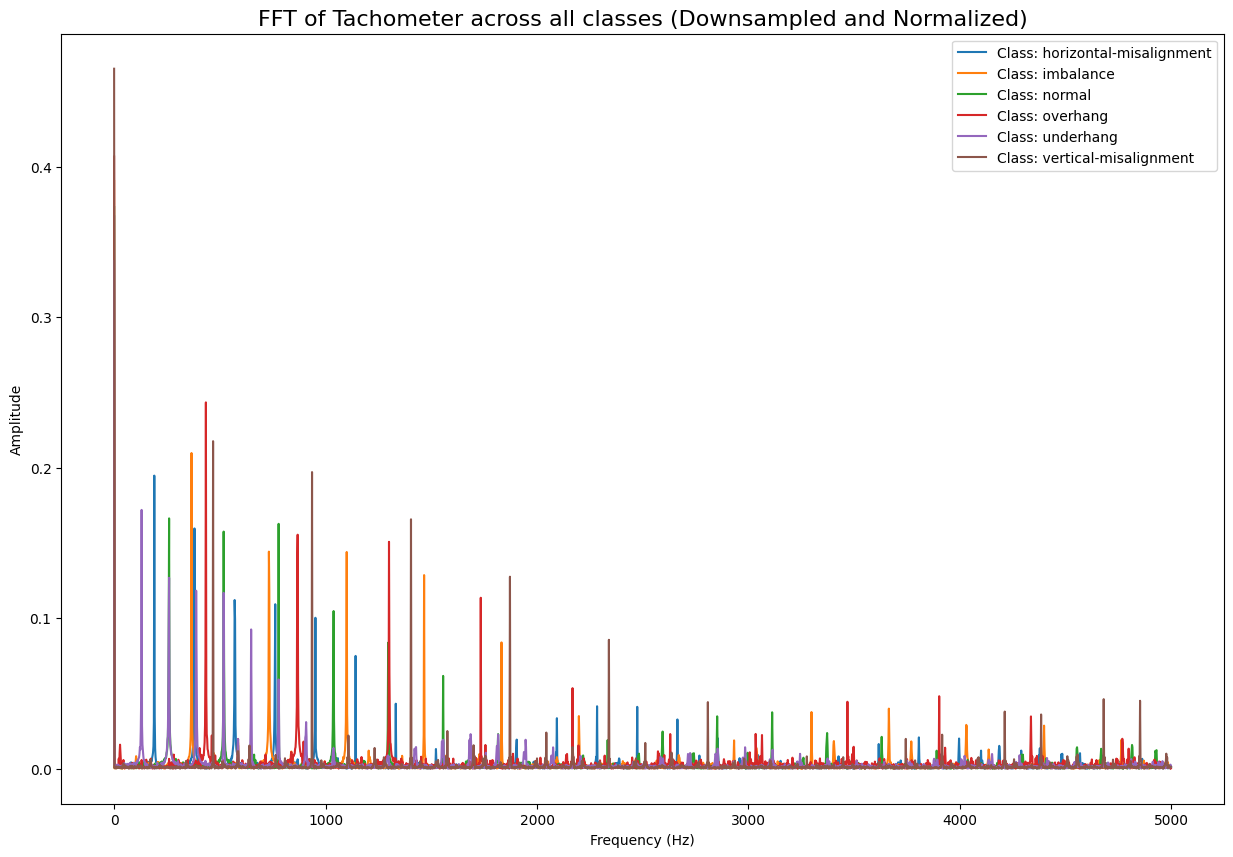

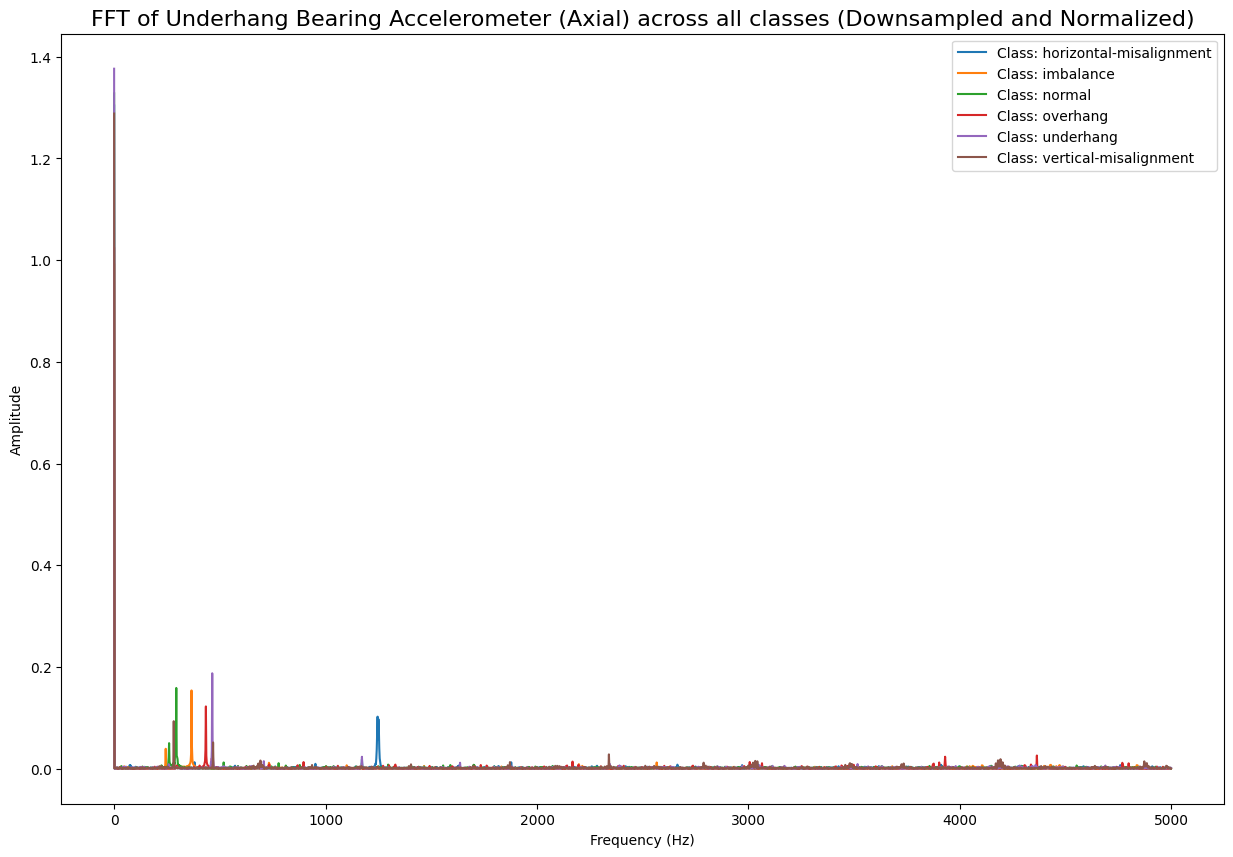

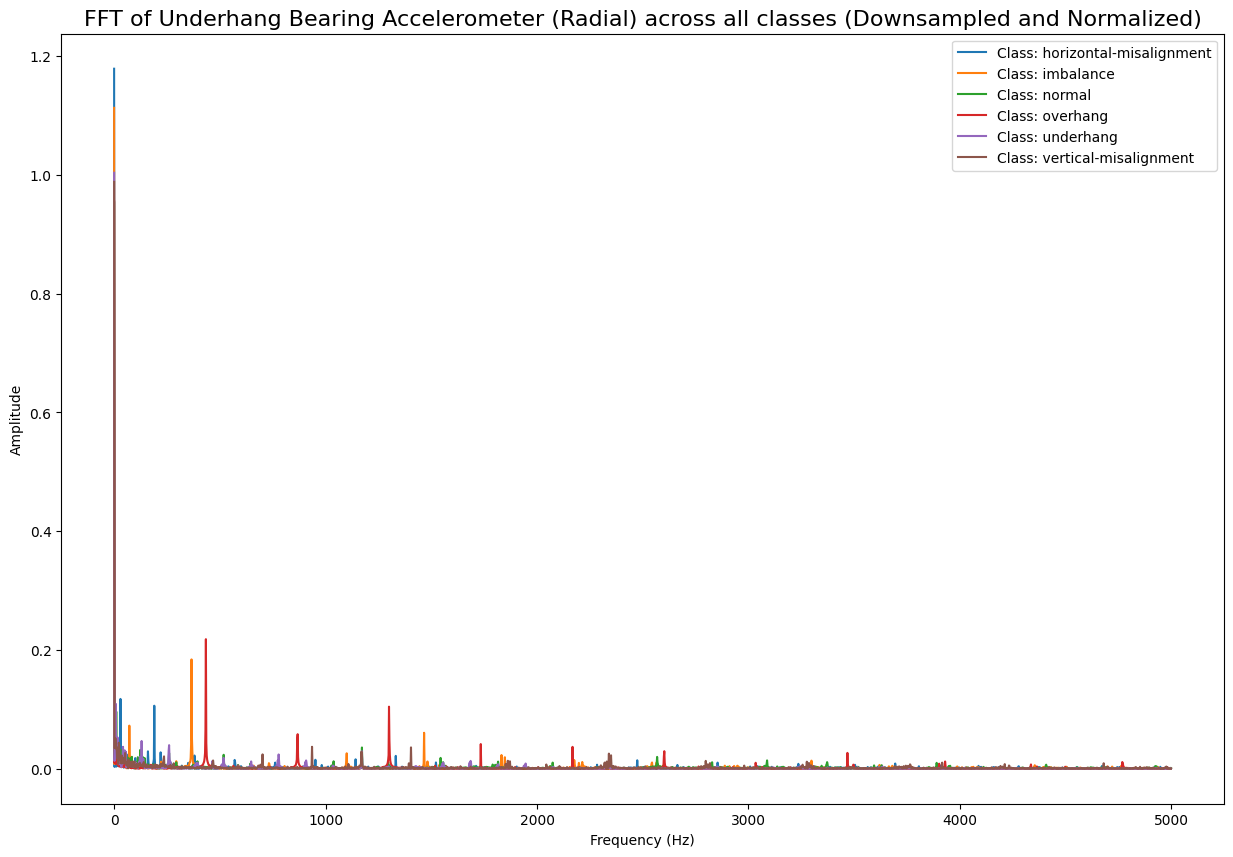

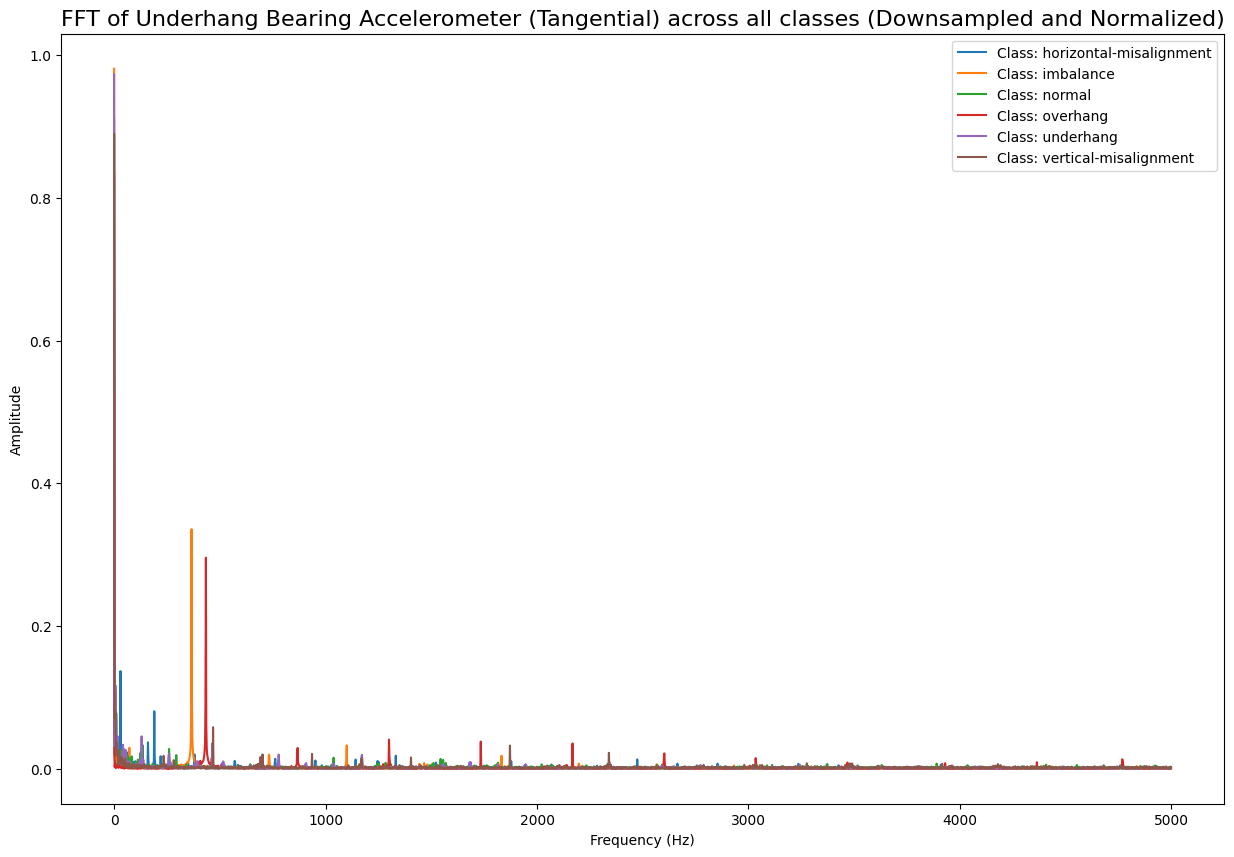

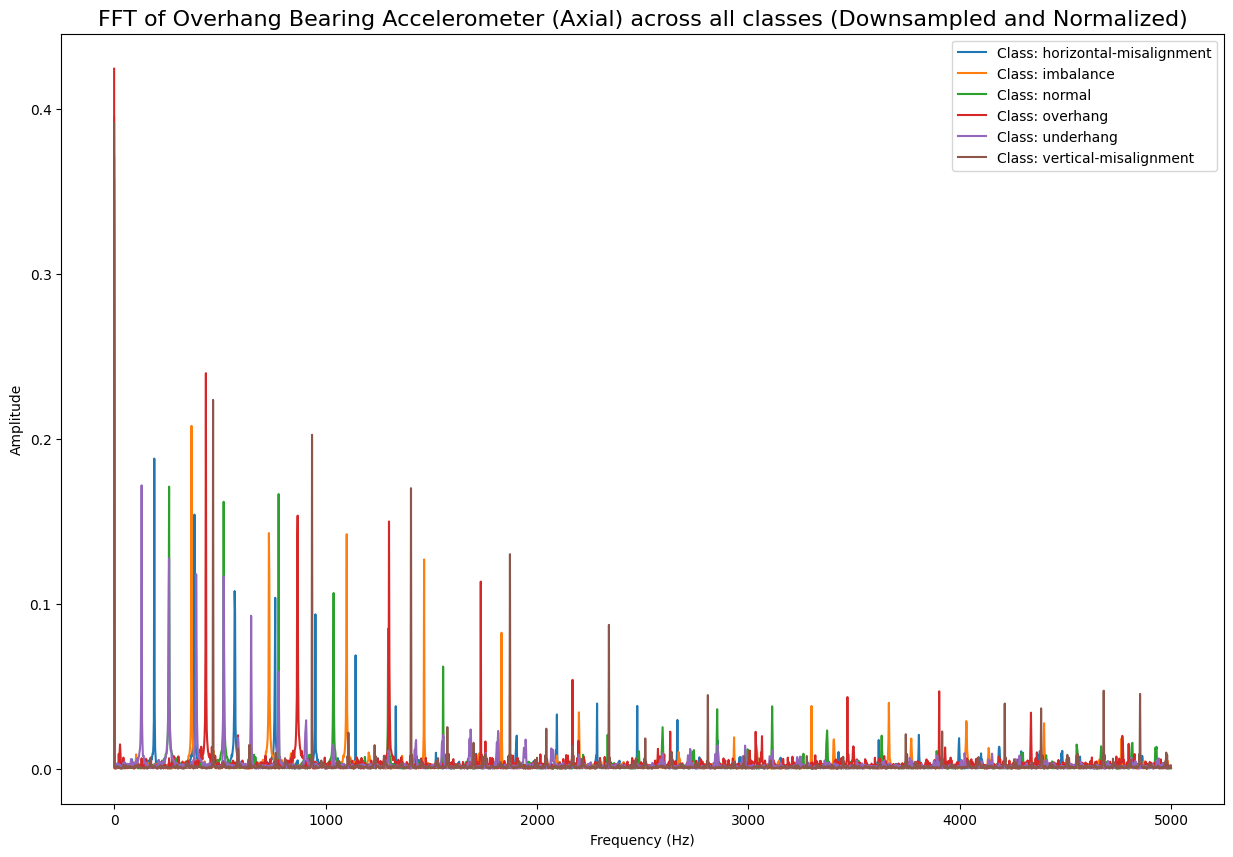

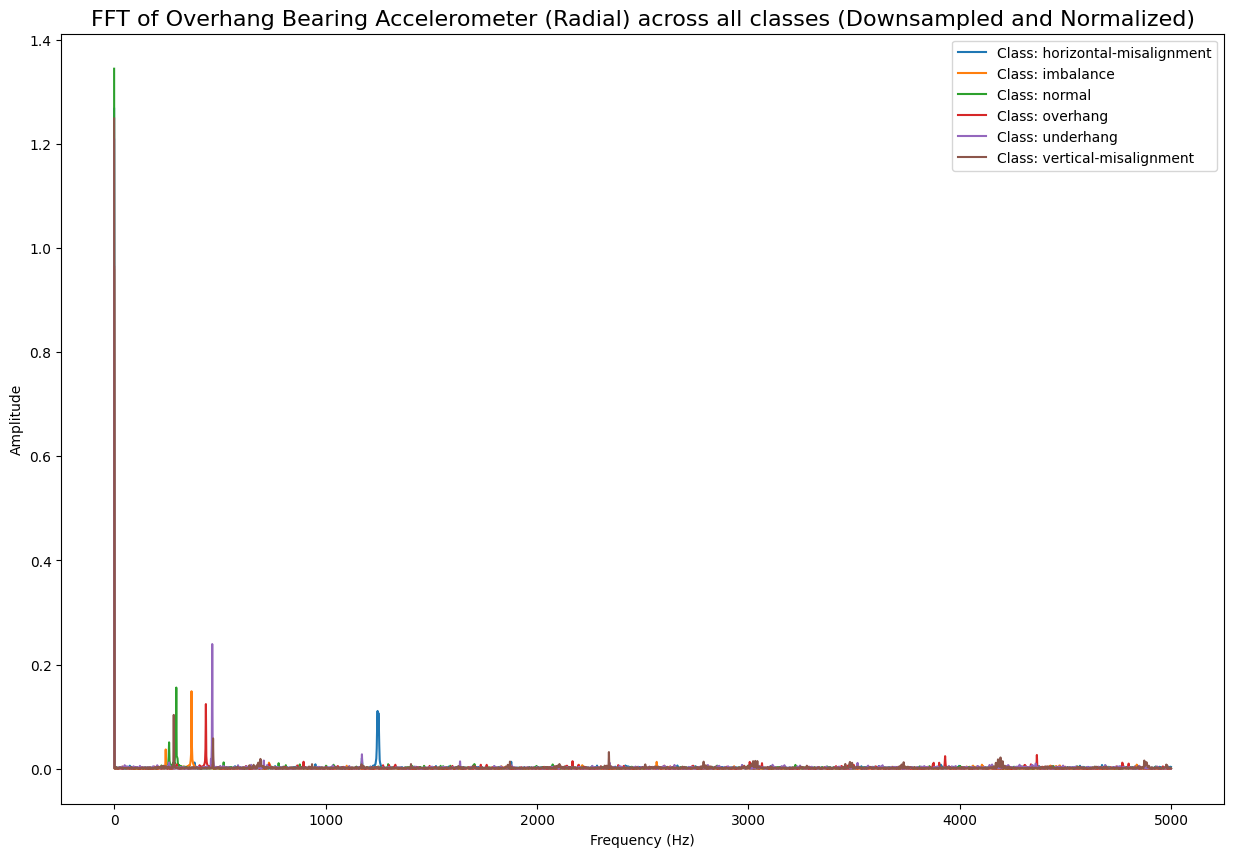

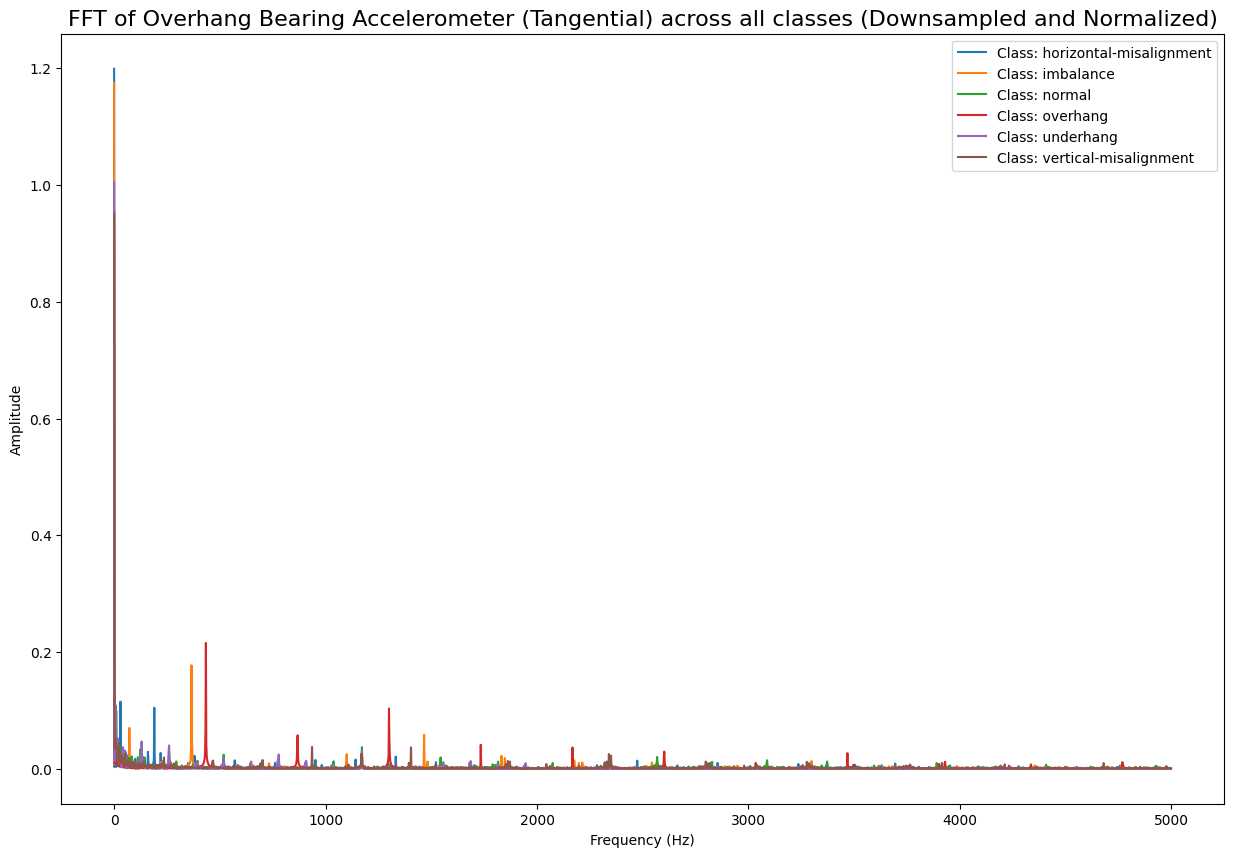

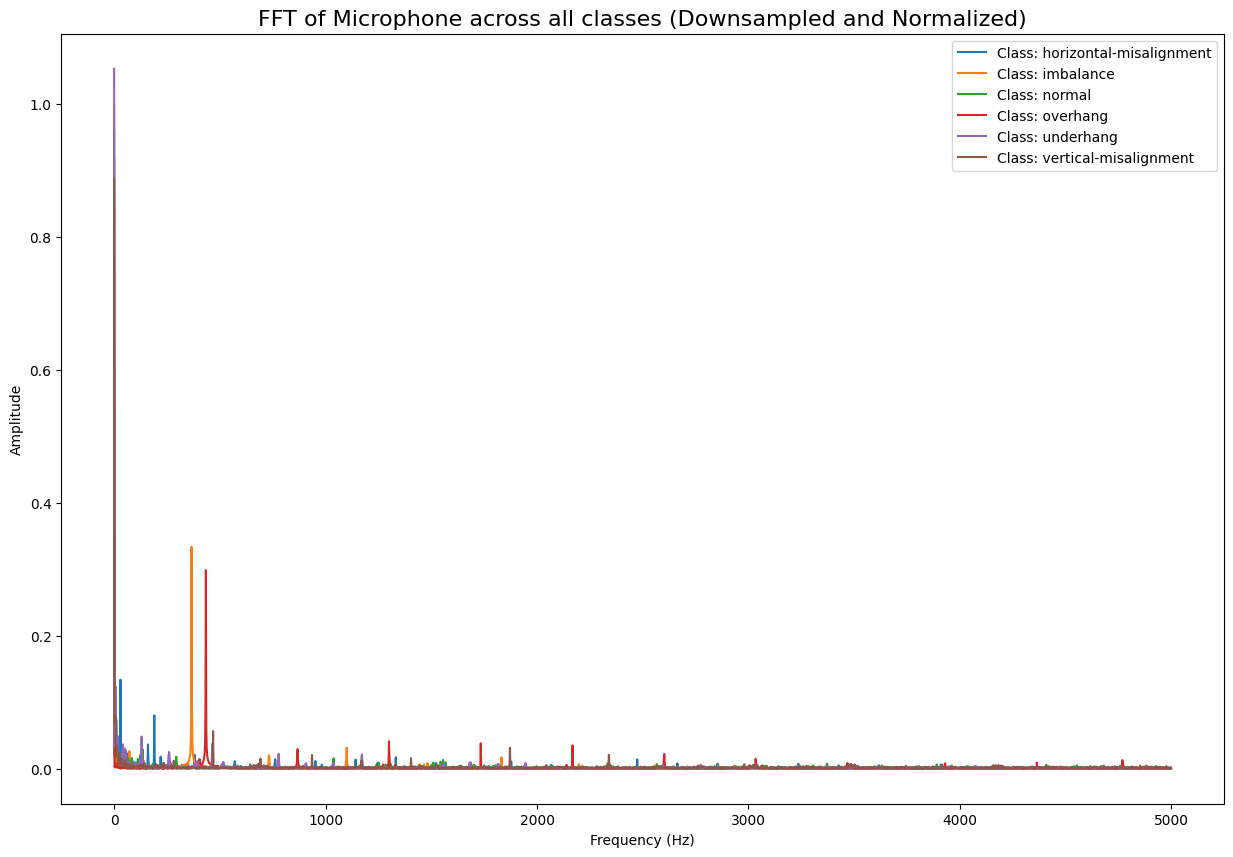

In [32]:
# Plot the FFT of the signals for each feature
for feature_idx in range(8):
    plt.figure(figsize=(15, 10))
    plt.title(f'FFT of {feature_labels[feature_idx]} across all classes (Downsampled and Normalized)', fontsize=16)
    
    for example_idx, cls in random_examples:
        signals = normalized_data[example_idx]
        label = labels[example_idx]
        xf, yf = compute_fft(signals[:, feature_idx], 10000)
        plt.plot(xf, yf, label=f'Class: {label}')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

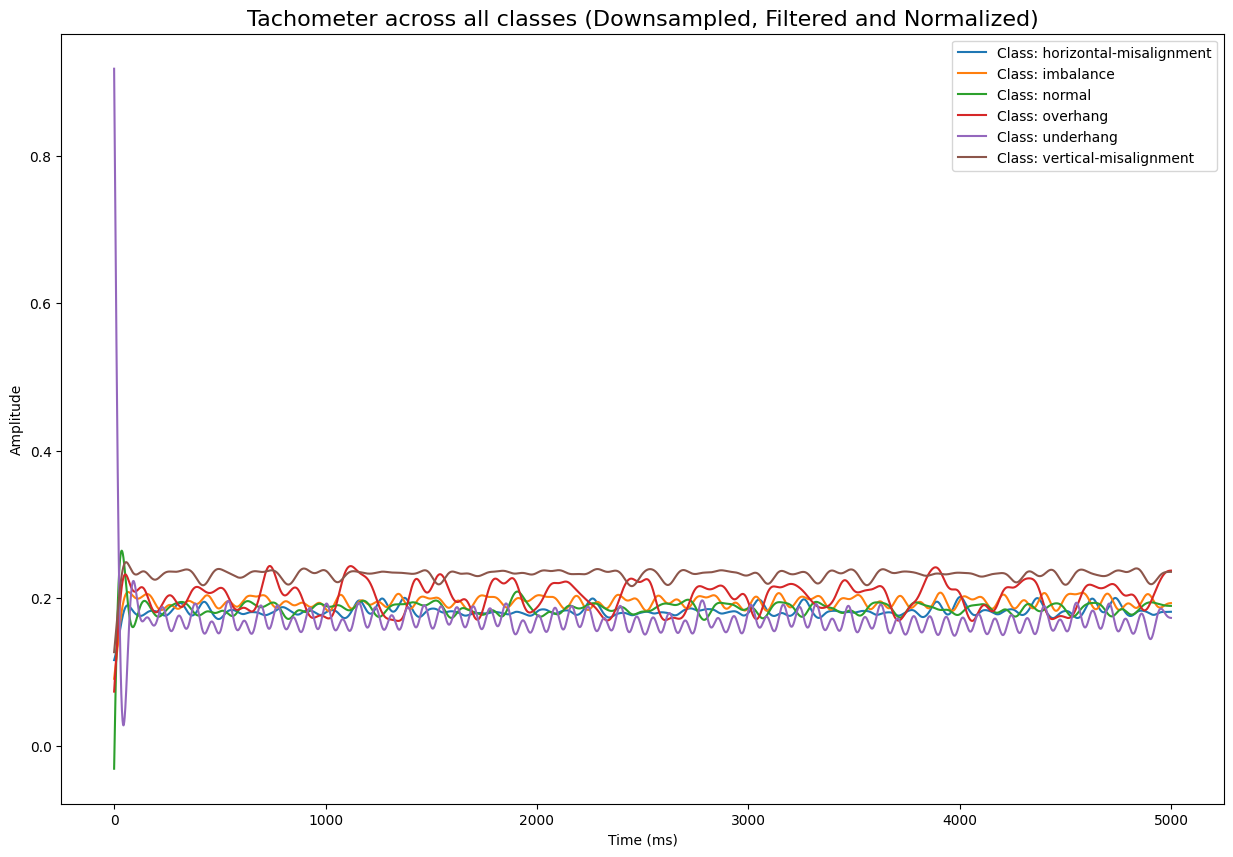

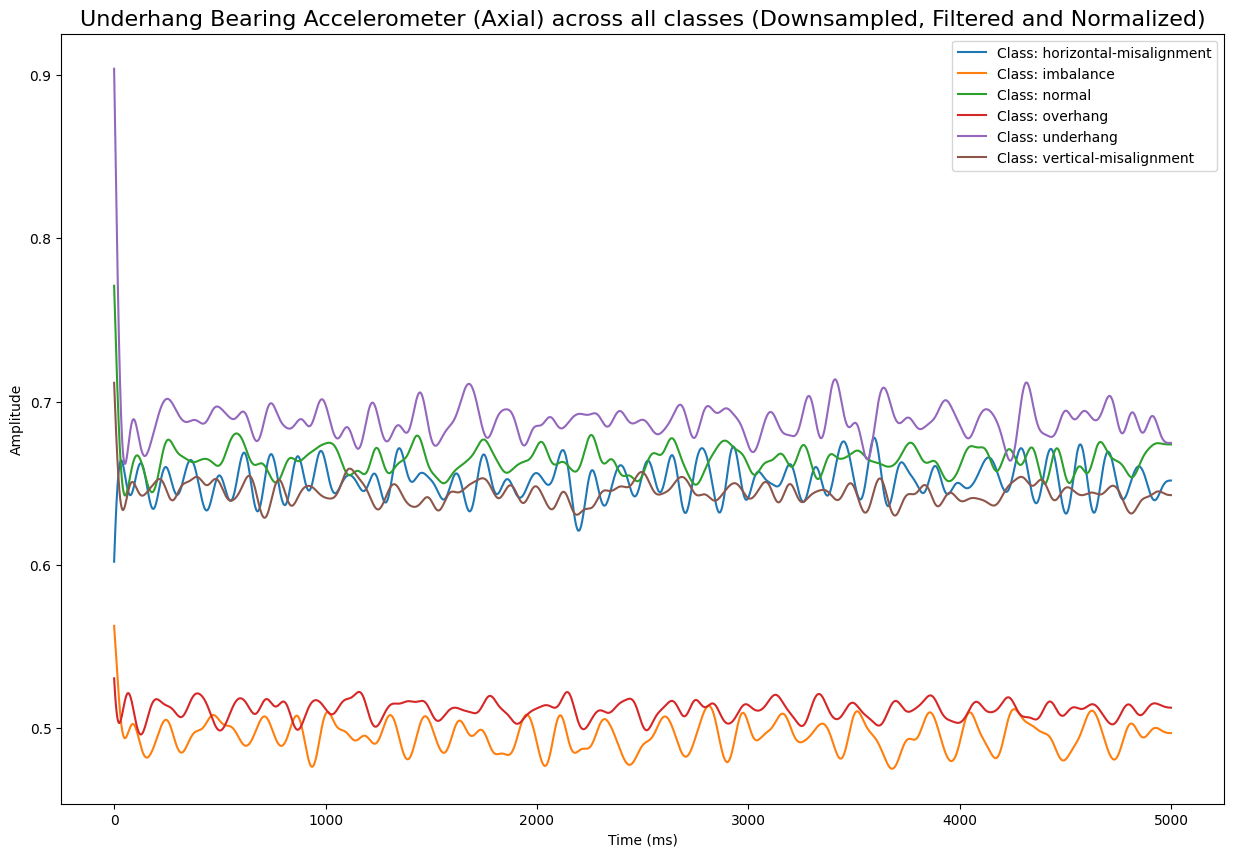

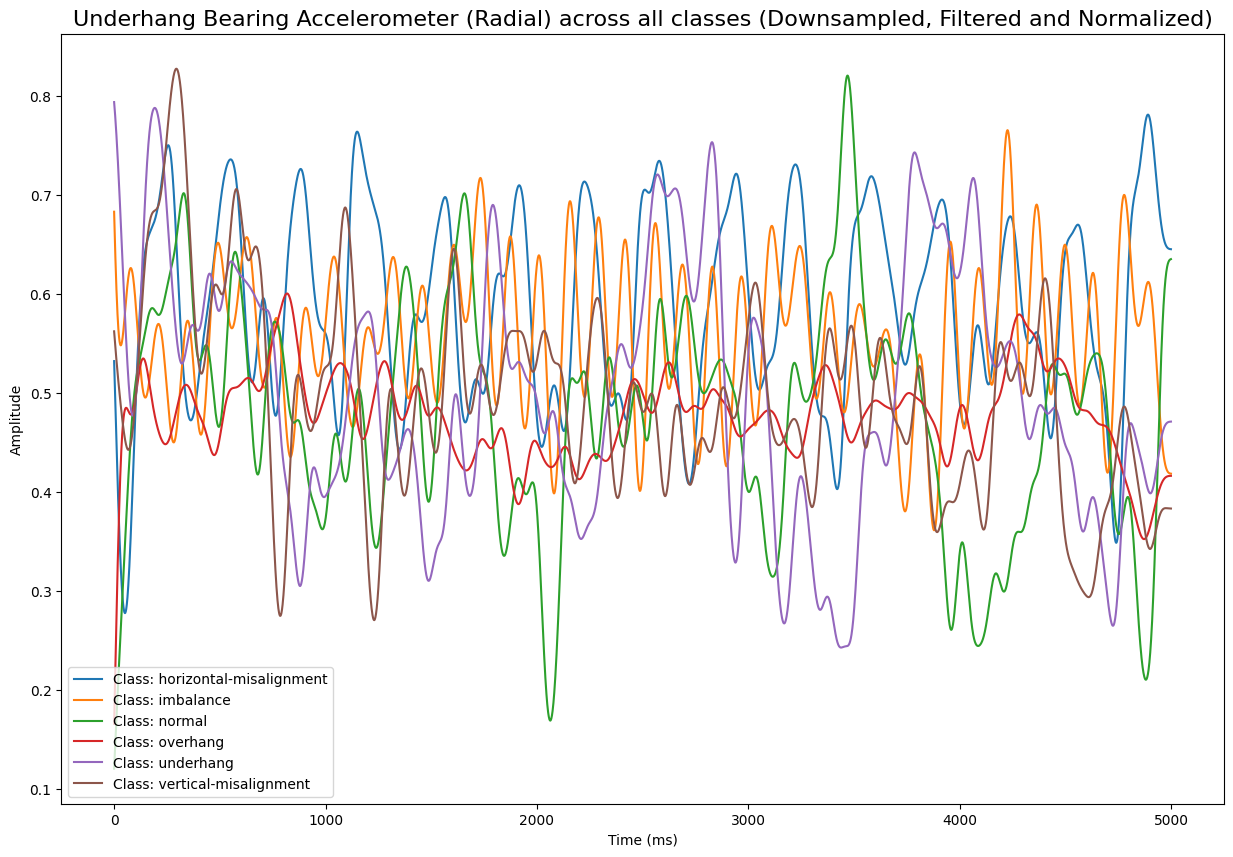

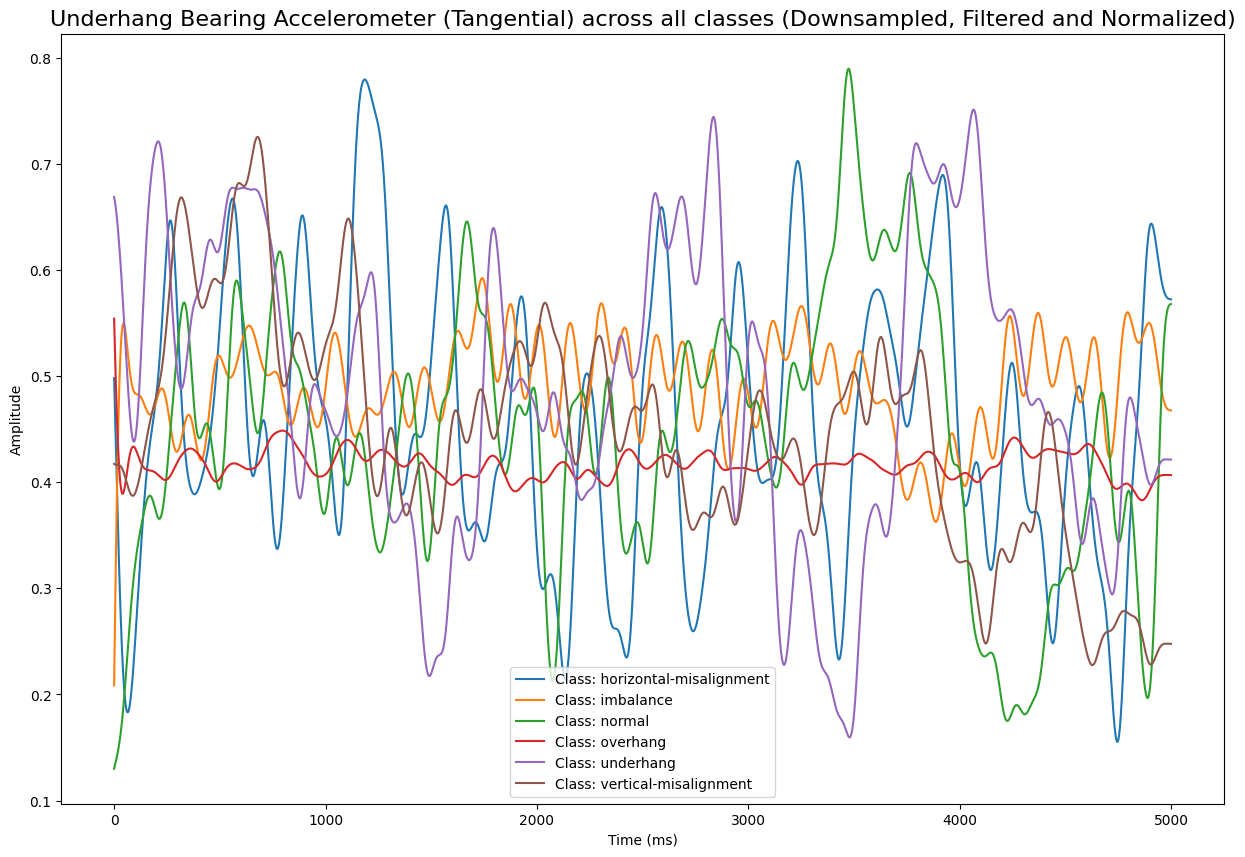

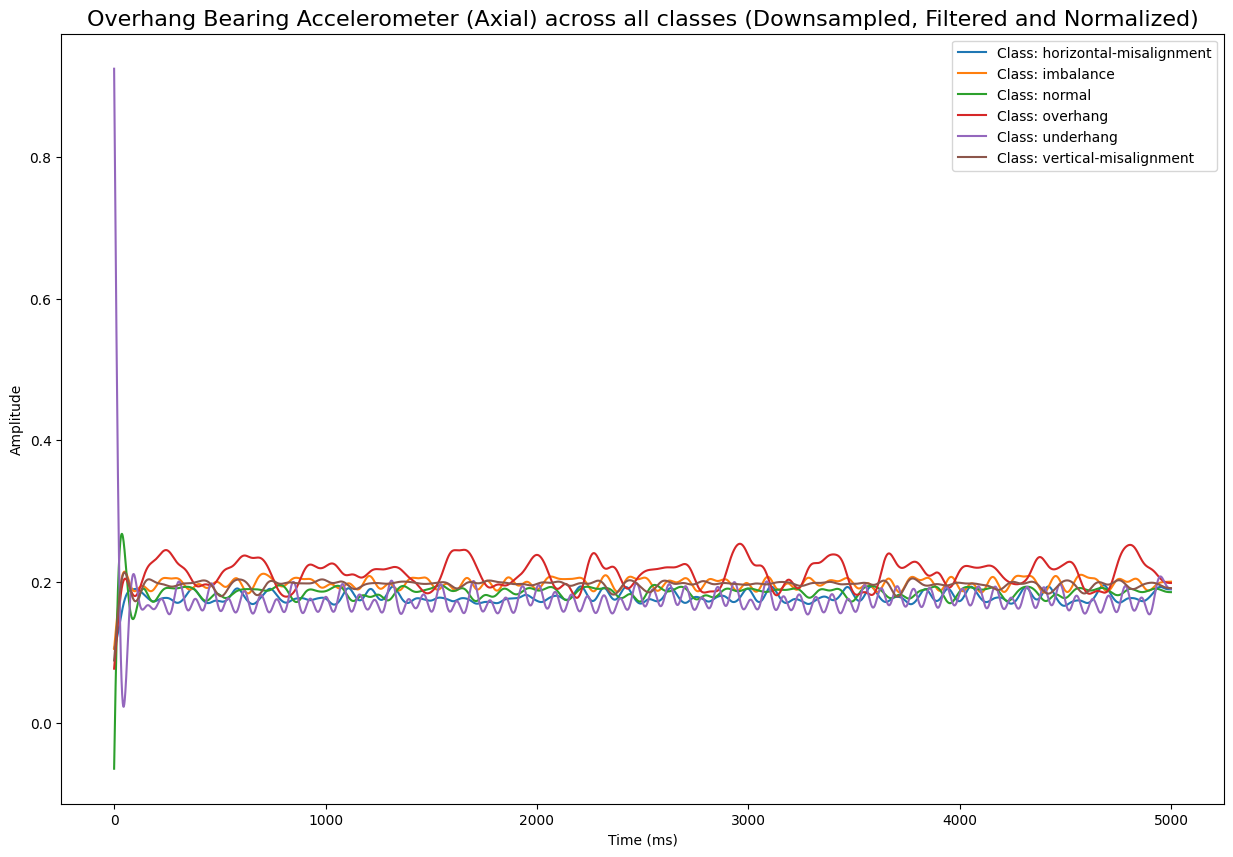

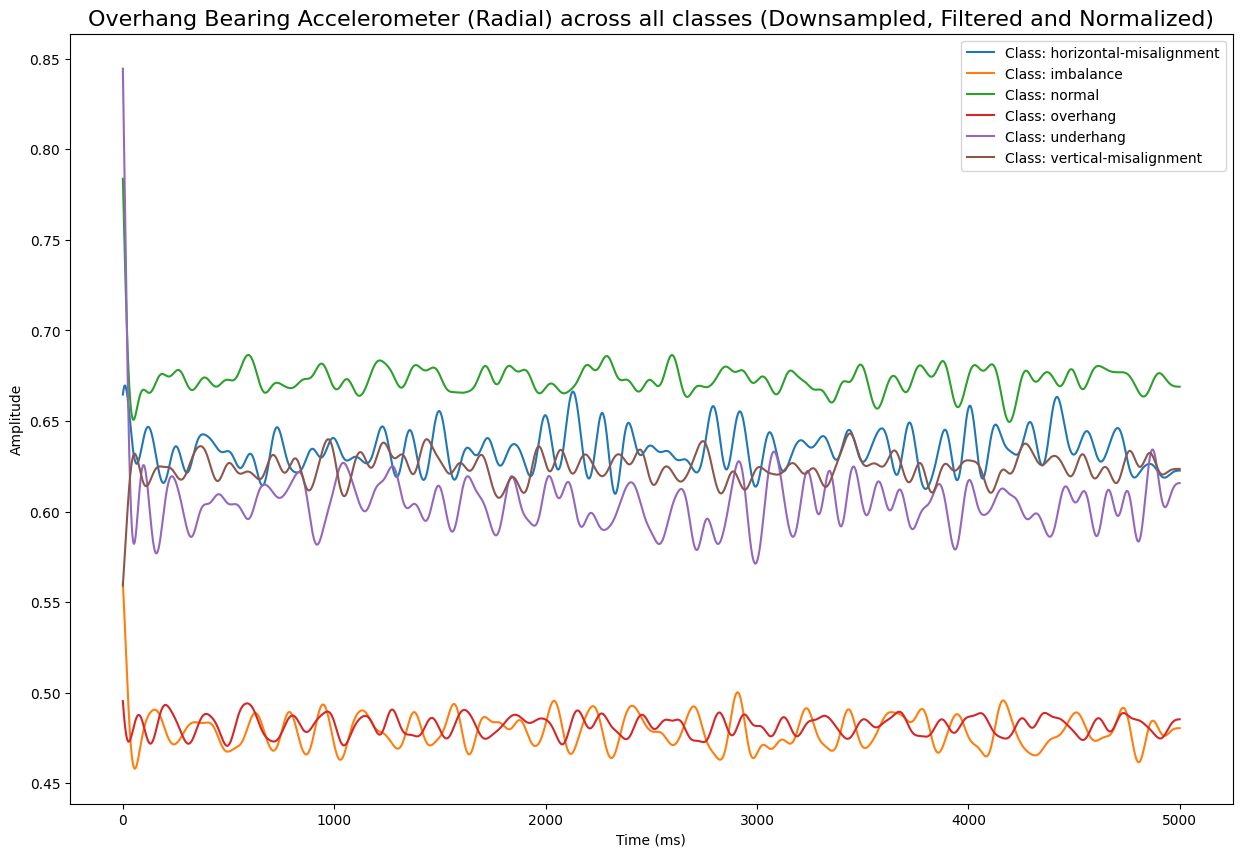

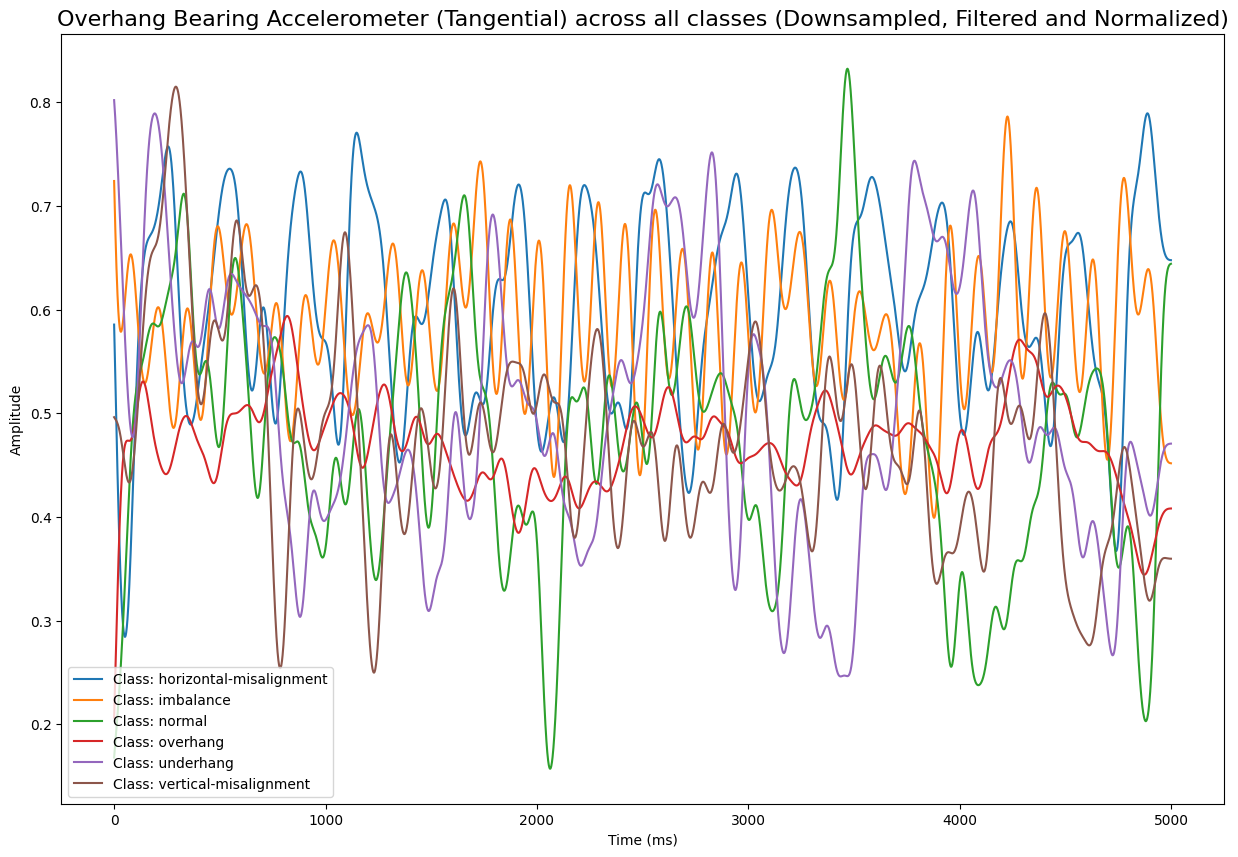

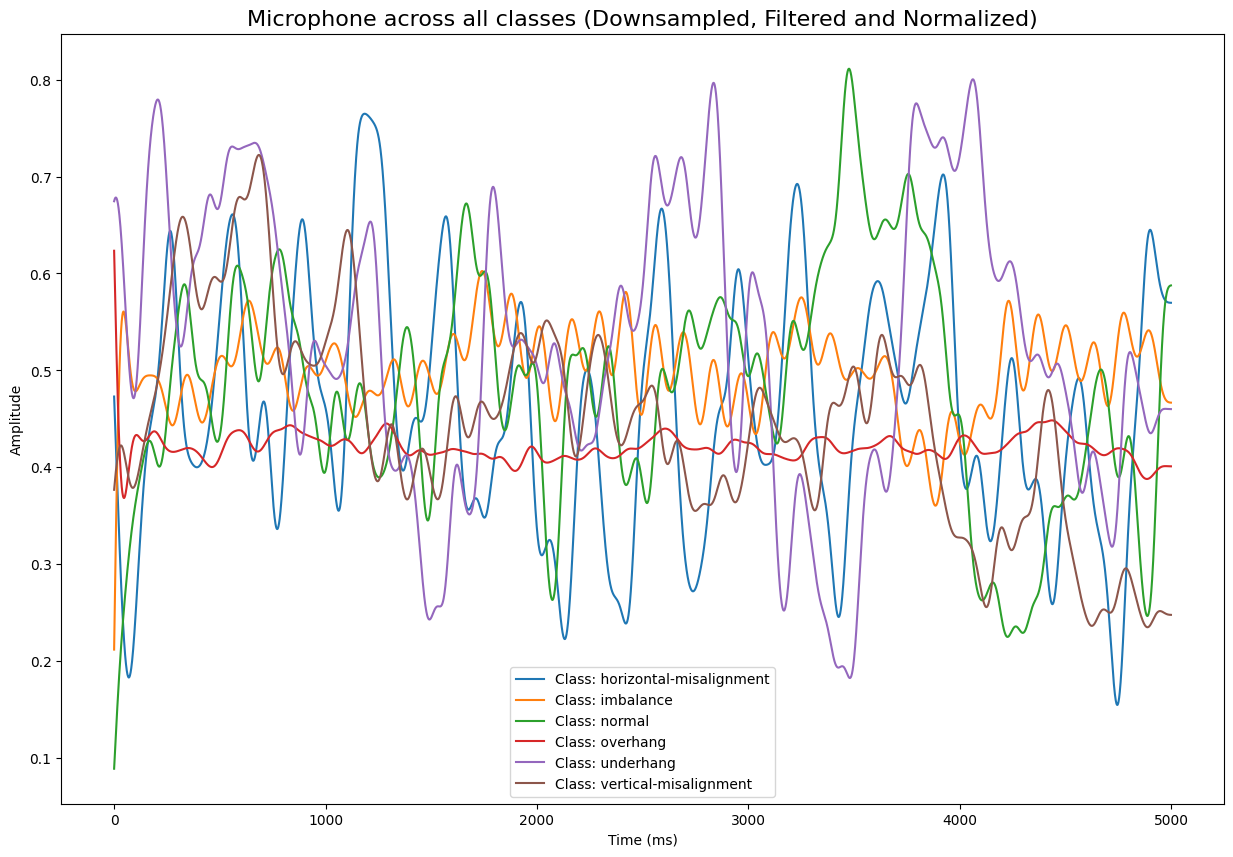

In [29]:
# Plot the signals for each feature
for feature_idx in range(8):
    plt.figure(figsize=(15, 10))
    plt.title(f'{feature_labels[feature_idx]} across all classes (Downsampled, Filtered and Normalized)', fontsize=16)
    
    for example_idx, cls in random_examples:
        signals = filtered_data[example_idx]
        label = labels[example_idx]
        plt.plot(signals[:, feature_idx], label=f'Class: {label}')
    
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()